<h1>How to understand data statistically through plotting? </h1>
<br>
Seaborn is another library built on top of matplotlib, and integrates closely with pandas dataframes. It’s especially known for its nice aesthetics and built-in statistical features in plots. 

<p class="lead"> 
Table of Content: 

- <a href="#Why-do-we-use-seaborn?">Why do we use seaborn?</a>
- <a href="#Seaborn-plotting-syntax">Seaborn plotting syntax</a>    
- <a href="#Create-statistical-plots">Create statistical plots</a>
- <a href="#Visualizing-multiple-relationships">Visualizing multiple relationships</a>

    
</p>





<div>
<h2 class="breadcrumb">Why do we use seaborn?</h2><p>
</div>

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. (seaborn.pydata.org)

- The syntax is simple and easy to use. 
- Seaborn provides out-of-box nice looking plots. Check out the [example gallery](https://seaborn.pydata.org/examples/index.html) for inspirations. 
- It's natural to include statistical information in your plots using Seaborn. 

<div>
<h2 class="breadcrumb">Seaborn plotting syntax</h2><p>
</div>

Import libraries and data:

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('assets/mpg.csv')

<div class="alert alert-success">
<h4>Tips</h4>

- Use `sns.set_theme()` for default seaborn theme.

In [3]:
sns.set_theme()

## Axes-level functions 
Axes-level functions plot data onto a single `matplotlib.pyplot.Axes` object.

### Histogram

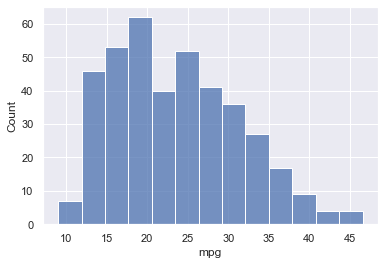

In [4]:
sns.histplot(df, x='mpg');

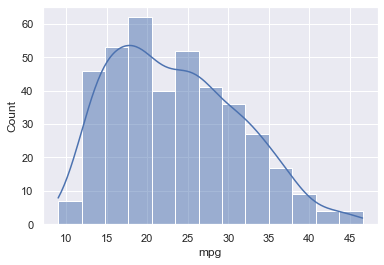

In [5]:
sns.histplot(data=df, x='mpg', kde=True);

### Scatter plot

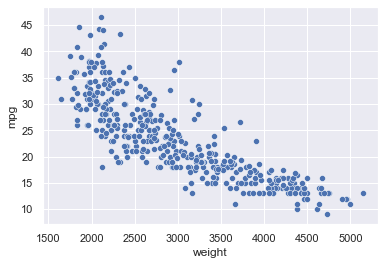

In [6]:
sns.scatterplot(data=df, x='weight', y='mpg');

### Add `hue` to determine the color of plot elements

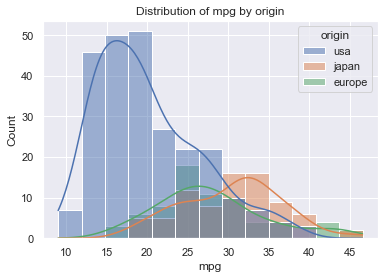

In [7]:
sns.histplot(data=df, x='mpg', kde=True, hue='origin').set(title='Distribution of mpg by origin');

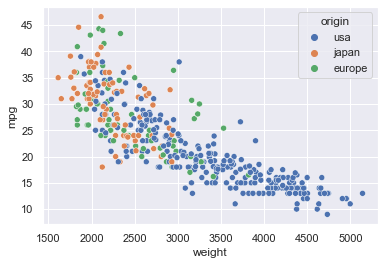

In [8]:
sns.scatterplot(data=df, x='weight', y='mpg', hue='origin');

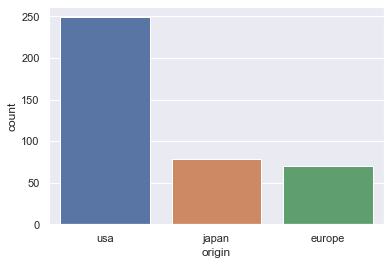

In [9]:
sns.countplot(data=df, x='origin');

### Integrate with Matplotlib

> The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

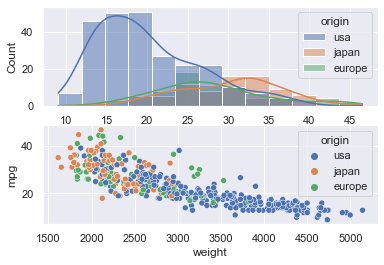

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
sns.histplot(data=df, x='mpg', kde=True, hue='origin', ax=ax[0]);
sns.scatterplot(data=df, x='weight', y="mpg", hue='origin', ax=ax[1]);

In [11]:
sns.histplot(data=dfe, x='body_mass_g', kde=True, hue='species');

NameError: name 'dfe' is not defined

<div class="alert alert-info">
<h4>Exercise</h4>

- Load the Penguins dataset from 'assets/penguins.csv' and call it `dfe`.  
- Use seaborn to visualize the distribution of body mass, the relationship between flipper length and body mass, and visualize the differences among species. 
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
dfe = pd.read_csv('assets/penguins.csv')
sns.histplot(data=dfe, x='body_mass_g', kde=True, hue='species');
sns.scatterplot(data=dfe, x='flipper_length_mm', y="body_mass_g", hue='species');
```

</details>
</div>

### Figure-level functions

<img id="Image1" src="assets/seaborn.jpeg" align="left"/>

In [ ]:
sns.relplot(data=df, x='weight', y='mpg');

In [ ]:
sns.displot(df, x='mpg', kind='ecdf');

In [ ]:
sns.catplot(data=df, x='origin', y='mpg', kind='violin');

<div class="alert alert-info">
<h4>Exercise</h4>

- Explore the Figure-level functions with the Penguins dataset.
    
</div>

<div>
<h2 class="breadcrumb">Create statistical plots</h2><p>
</div>

### Plotting the confidence interval or standard deviation aroud the mean

- Default: plot 95% CI. 
> The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean.


- Define `ci='sd'`
> Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

In [ ]:
sns.relplot(data=df, x='cylinders', y='mpg', ci='sd', kind='line');

### Draw linear regression models

In [ ]:
sns.lmplot(data=df, x='weight', y='mpg');

Specify hue and markers for origin:

In [ ]:
sns.lmplot(data=df, x="weight", y="mpg", hue="origin", markers=['o','x','+']);

Separate plot by origin in three columns:

In [ ]:
sns.lmplot(data=df, x="weight", y="mpg", col="origin");

<div class="alert alert-info">
<h4>Exercise</h4>

- Plot the relationship between flipper length and body mass, visualize the differences among species, and draw regression lines in those plots. 
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
sns.lmplot(data=dfe, x='flipper_length_mm', y="body_mass_g");
sns.lmplot(data=dfe, x='flipper_length_mm', y="body_mass_g", hue='species');
```

</details>
</div>

<div>
<h2 class="breadcrumb">Visualizing multiple relationships</h2><p>
</div>

>  `jointplot()` and `pairplot()`, employ multiple kinds of plots from different modules to represent mulitple aspects of a dataset in a single figure.

> jointplot() focuses on a single relationship:

In [ ]:
sns.jointplot(data=df, x="weight", y="mpg", kind="reg");

In [ ]:
sns.jointplot(data=df, x="weight", y="mpg", hue='origin');

> pairplot() visualizes every pairwise combination of variables simultaneously:

In [ ]:
sns.pairplot(data=df);

In [ ]:
sns.pairplot(data=df, hue="origin")

<div class="alert alert-info">
<h4>Exercise</h4>

- Visualize mutliple relationships in the Penguins dataset using the `jointplot()` and `pairplot()` functions.
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
sns.jointplot(data=dfe, x='flipper_length_mm', y="body_mass_g", hue='species');
sns.pairplot(data=dfe);
```

</details>
</div>